In [8]:
import requests
import pandas as pd

end_date = pd.Timestamp.now()
settlementDate = (end_date - pd.Timedelta(hours=0.5)).date()
settlementPeriod = (end_date - pd.Timedelta(hours=0.5)).hour * 2

# options - 'PN', 'QPN', 'MILS', 'MELS'
dataset = 'MELS'

web = 'https://data.elexon.co.uk/bmrs/api/v1/balancing/physical/all?dataset=' + dataset + '&settlementDate=' + str(settlementDate) + '&settlementPeriod=' + str(settlementPeriod) + '&format=json'

r = requests.get(web)
df = pd.DataFrame(r.json()['data'])
# df.index = df['nationalGridBmUnit']
df.set_index('nationalGridBmUnit', inplace=True)
df

,dataset,settlementDate,settlementPeriod,timeFrom,timeTo,levelFrom,levelTo,bmUnit
nationalGridBmUnit,,,,,,,,
AG-COCT00,MELS,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,2,2,2__CMRCY001
DIDCB6,MELS,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,336,335,T_DIDCB6
LAGA-1,MELS,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,384,383,T_LAGA-1
RYHPS-1,MELS,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,694,692,T_RYHPS-1
SEAB-1,MELS,2024-02-02,22,2024-02-02T10:59:00Z,2024-02-02T11:00:00Z,769,769,T_SEAB-1
...,...,...,...,...,...,...,...,...
AG-FLX02N,MELS,2024-02-02,22,2024-02-02T10:30:00Z,2024-02-02T11:00:00Z,0,0,V__NFLEX001
AG-FLX07N,MELS,2024-02-02,22,2024-02-02T10:30:00Z,2024-02-02T11:00:00Z,0,0,V__NFLEX002
AG-HEL0DN,MELS,2024-02-02,22,2024-02-02T10:30:00Z,2024-02-02T11:00:00Z,0,0,V__NHABI005


<Axes: title={'center': 'Final Physical Notification Level (MW)'}, xlabel='nationalGridBmUnit'>

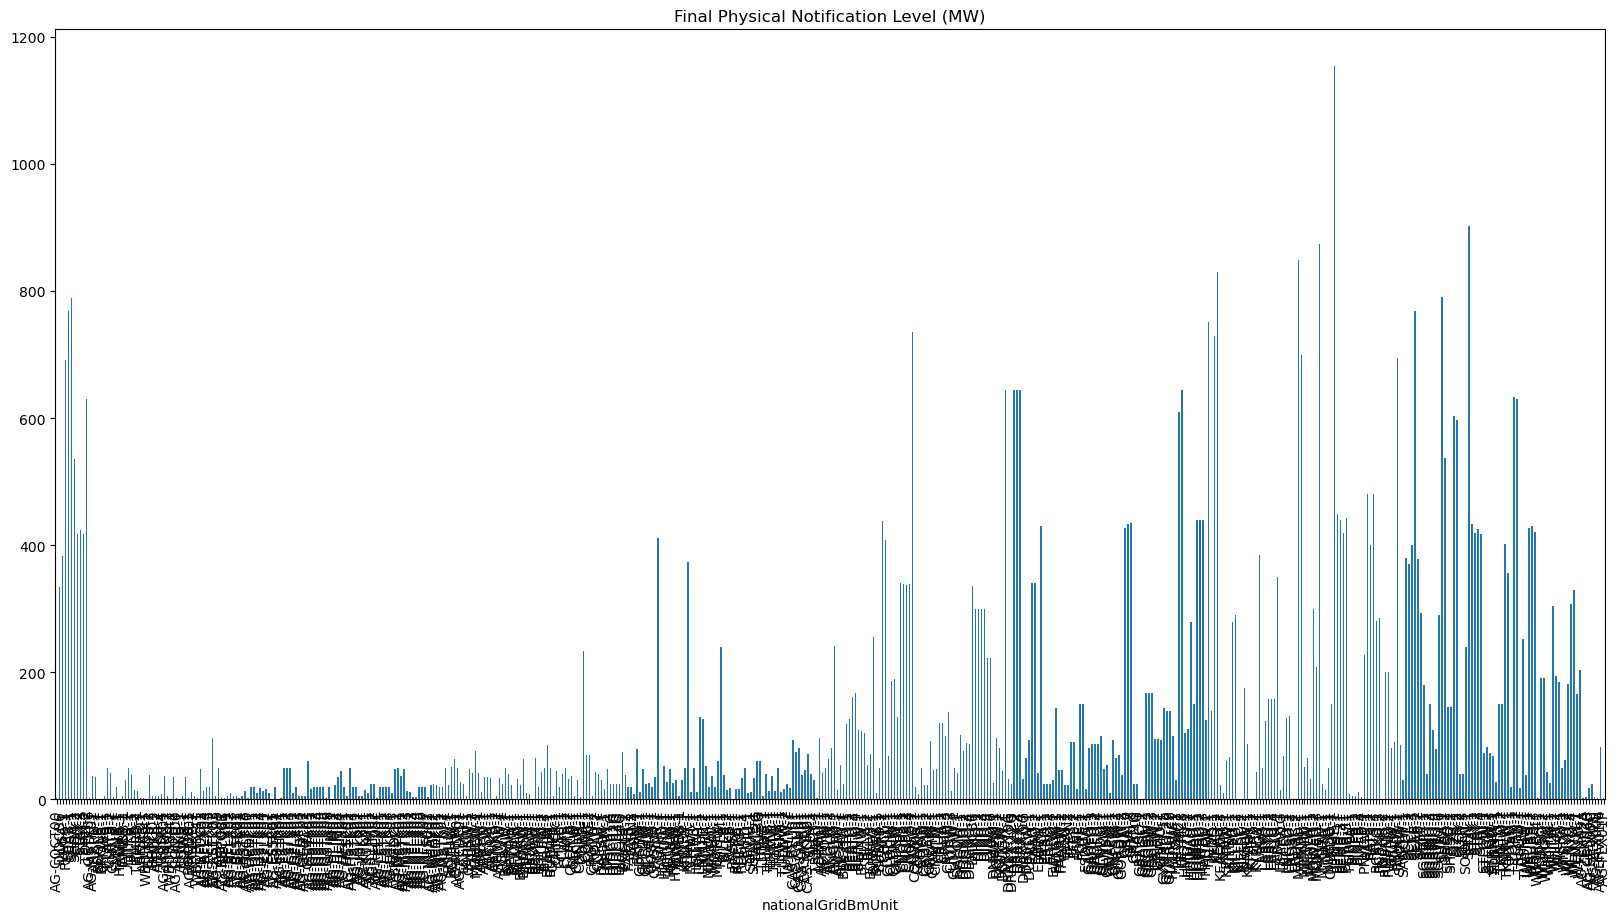

In [9]:
ds_plot = df['levelTo'].dropna().astype('float')
ds_plot[ds_plot != 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW)')

In [10]:
ds_plot.sum()

64778.0